# Lecture 1 - Vacuum Rabi oscillations in the Jaynes-Cummings model

Author: J. R. Johansson (robert@riken.jp), https://jrjohansson.github.io/

This lecture series was developed by J.R. Johansson. The original lecture notebooks are available [here](https://github.com/jrjohansson/qutip-lectures).

This is a slightly modified version of the lectures, to work with the current release of QuTiP. You can find these lectures as a part of the [qutip-tutorials repository](https://github.com/qutip/qutip-tutorials). This lecture and other tutorial notebooks are indexed at the [QuTiP Tutorial webpage](https://qutip.org/tutorials.html).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mesolve, ptrace, qeye, tensor, wigner

%matplotlib inline

# Introduction

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form)

### $H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$

or with the rotating-wave approximation

### $H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+)$

where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength.

### Problem parameters


Here we use units where $\hbar = 1$: 

In [2]:
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005  # cavity dissipation rate
gamma = 0.05  # atom dissipation rate
N = 15  # number of cavity fock states
n_th_a = 0.0  # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0, 25, 101)

### Setup the operators, the Hamiltonian and initial state

In [3]:
# initial state
psi0 = tensor(basis(N, 0), basis(2, 1))  # start with an excited atom

# operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + \
        g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + \
        g * (a.dag() + a) * (sm + sm.dag())

### Create a list of collapse operators that describe the dissipation

In [4]:
c_ops = []

# cavity relaxation
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a)

# cavity excitation, if temperature > 0
rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * sm)

### Evolve the system

Here we evolve the system with the Lindblad master equation solver, and we request that the expectation values of the operators $a^\dagger a$ and $\sigma_+\sigma_-$ are returned by the solver by passing the list `[a.dag()*a, sm.dag()*sm]` as the fifth argument to the solver.

In [5]:
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm])

## Visualize the results

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the `mesolve` above). We can clearly see how energy is being coherently transferred back and forth between the cavity and the atom.

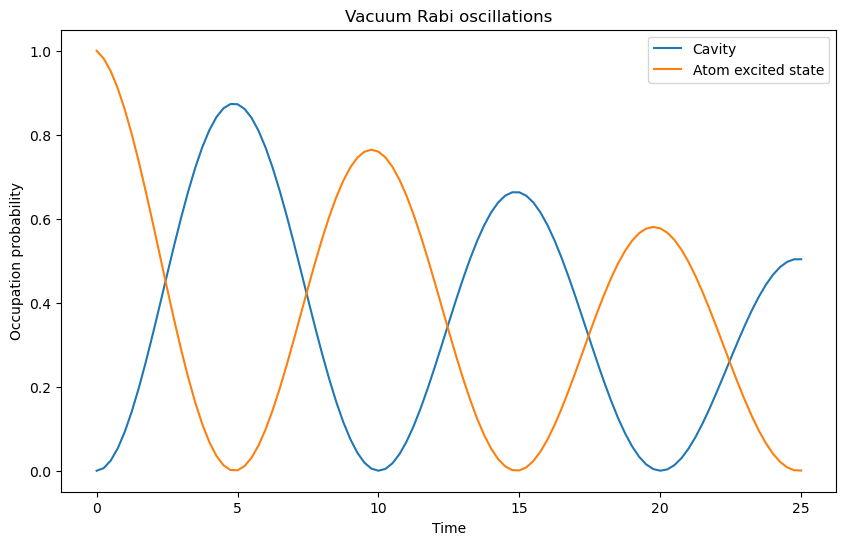

In [6]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi oscillations");

## Cavity wigner function

In addition to the cavity's and atom's excitation probabilities, we may also be interested in for example the wigner function as a function of time. The Wigner function can give some valuable insight in the nature of the state of the resonators. 

To calculate the Wigner function in QuTiP, we first recalculate the evolution without specifying any expectation value operators, which will result in that the solver returns a list of density matrices for the system for the given time coordinates.

In [7]:
output = mesolve(H, psi0, tlist, c_ops, [])

Now, `output.states` contains a list of density matrices for the system for the time points specified in the list `tlist`:

In [8]:
output

Result object with mesolve data.
--------------------------------
states = True
num_collapse = 2

In [9]:
type(output.states)

list

In [10]:
len(output.states)

101

In [11]:
# indexing the list with -1 results in the last element in the list
output.states[-1]

Quantum object: dims = [[15, 2], [15, 2]], shape = (30, 30), type = oper, isherm = True
Qobj data =
[[4.96058553e-01+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         4.81112490e-04+0.j
  0.00000000e+00-0.01549669j 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j       

Now let's look at the Wigner functions at the point in time when atom is in its ground state: $t = \\{5, 15, 25\\}$ (see the plot above). 

For each of these points in time we need to:

 1. Find the system density matrix for the points in time that we are interested in.
 2. Trace out the atom and obtain the reduced density matrix for the cavity.
 3. Calculate and visualize the Wigner function for the reduced cavity density matrix.

In [12]:
# find the indices of the density matrices for the times we are interested in
t_idx = np.where([tlist == t for t in [0.0, 5.0, 15.0, 25.0]])[1]
tlist[t_idx]

array([ 0.,  5., 15., 25.])

In [13]:
# get a list density matrices
rho_list = [output.states[i] for i in t_idx]

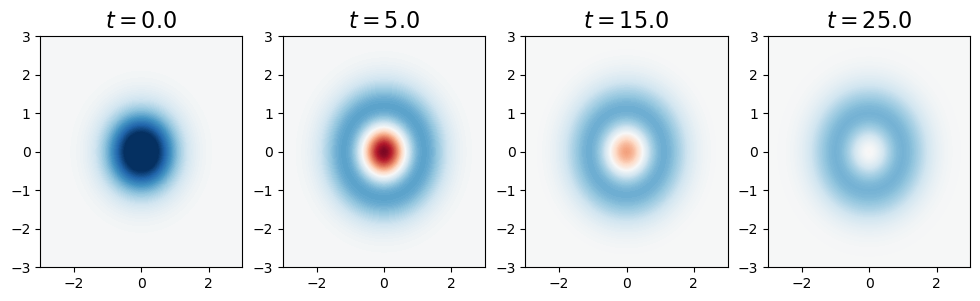

In [14]:
# loop over the list of density matrices

xvec = np.linspace(-3, 3, 200)

fig, axes = plt.subplots(1, len(rho_list), sharex=True,
                         figsize=(3 * len(rho_list), 3))

for idx, rho in enumerate(rho_list):

    # trace out the atom from the density matrix, to obtain
    # the reduced density matrix for the cavity
    rho_cavity = ptrace(rho, 0)

    # calculate its wigner function
    W = wigner(rho_cavity, xvec, xvec)

    # plot its wigner function
    axes[idx].contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-0.25, 0.25),
        cmap=plt.get_cmap("RdBu"),
    )

    axes[idx].set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

At $t =0$, the cavity is in its ground state. At $t = 5, 15, 25$ it reaches its maximum occupation in this Rabi-vacuum oscillation process. We can note that for $t=5$ and $t=15$ the Wigner function has negative values, indicating a truly quantum mechanical state. At $t=25$, however, the Wigner function no longer has negative values and can therefore be considered a classical state.

### Alternative view of the same thing

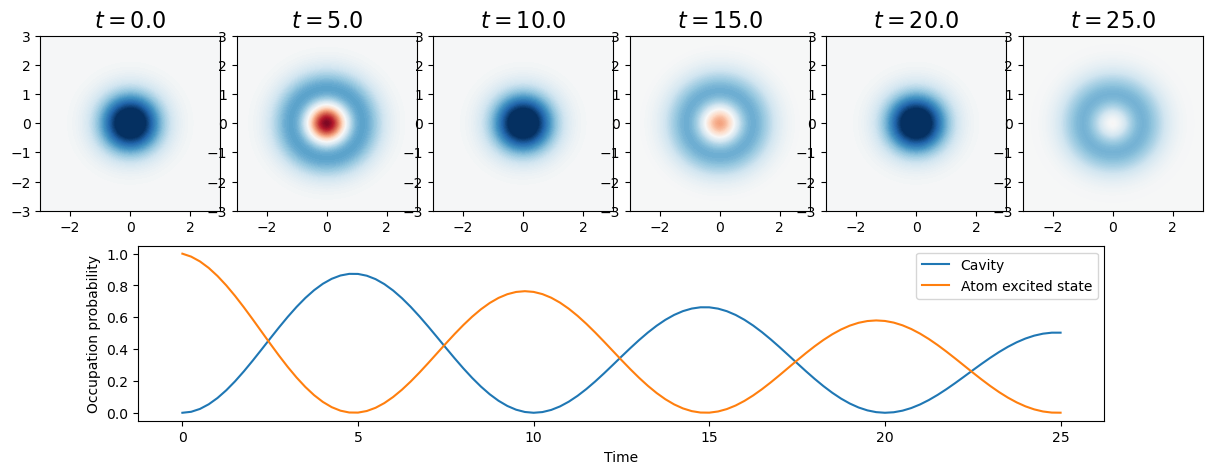

In [15]:
t_idx = np.where([tlist == t for t in [0.0, 5.0, 10, 15, 20, 25]])[1]
rho_list = [output.states[i] for i in t_idx]

fig_grid = (2, len(rho_list) * 2)
fig = plt.figure(figsize=(2.5 * len(rho_list), 5))

for idx, rho in enumerate(rho_list):
    rho_cavity = ptrace(rho, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2 * idx), colspan=2)
    ax.contourf(
        xvec,
        xvec,
        W,
        100,
        norm=mpl.colors.Normalize(-0.25, 0.25),
        cmap=plt.get_cmap("RdBu"),
    )
    ax.set_title(r"$t = %.1f$" % tlist[t_idx][idx], fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1] - 2))
ax.plot(tlist, n_c, label="Cavity")
ax.plot(tlist, n_a, label="Atom excited state")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability");

### Software versions

In [16]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.6
Numpy Version:      1.26.4
Scipy Version:      1.12.0
Cython Version:     0.29.37
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     4
BLAS Info:          Generic
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/miniconda3/envs/test-environment-v4/lib/python3.10/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex refer